In [4]:
import pandas as pd
import os

In [65]:
basePath = r'C:\Users\YinZihao\Desktop\ESSEC\hackathon\data'

def get_all_file_paths(directory):
    file_paths = []  
    for root, directories, files in os.walk(directory):
        for filename in files:
            filepath = os.path.join(root, filename)
            file_paths.append(filepath)
    return file_paths

all_file_paths = get_all_file_paths(basePath)
files = [i for i in all_file_paths if i[-2:]!= 'md']
files

['C:\\Users\\YinZihao\\Desktop\\ESSEC\\hackathon\\data\\attendance.csv',
 'C:\\Users\\YinZihao\\Desktop\\ESSEC\\hackathon\\data\\entity_schedule.csv',
 'C:\\Users\\YinZihao\\Desktop\\ESSEC\\hackathon\\data\\glossary.xlsx',
 'C:\\Users\\YinZihao\\Desktop\\ESSEC\\hackathon\\data\\link_attraction_park.csv',
 'C:\\Users\\YinZihao\\Desktop\\ESSEC\\hackathon\\data\\parade_night_show.xlsx',
 'C:\\Users\\YinZihao\\Desktop\\ESSEC\\hackathon\\data\\waiting_times.csv']

In [103]:
basePath = r'C:\\Users\\YinZihao\\Desktop\\ESSEC\\hackathon\\data\\'
# base = pd.read_csv(basePath + 'waiting_times.csv')
# attendance = pd.read_csv(basePath + 'attendance.csv') #only two parks, useless
# entity_schedual = pd.read_csv(basePath + 'entity_schedule.csv')
# link_attraction_park = pd.read_csv(basePath + 'link_attraction_park.csv')#map
# parade_night_show = pd.read_excel(basePath + 'parade_night_show.xlsx') #parade of which park?
weather_data = pd.read_csv(basePath + 'weather_data.csv')

In [146]:
weather_data['date'] = weather_data.dt_iso.apply(lambda x:pd.to_datetime(x[:13]))
weather_data2 = weather_data[weather_data.date>= '2018-01-01'][weather_data.date <= '2022-08-18']
weather_data2['merge_index'] = weather_data2.dt_iso.apply(lambda x:x[:13])
weather_data2.drop(columns = ['date'],inplace = True)
base['merge_index'] = base.DEB_TIME.apply(lambda x:x[:13])

C:\Users\YinZihao\AppData\Local\Temp\ipykernel_1284\3101698538.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  weather_data2 = weather_data[weather_data.date>= '2018-01-01'][weather_data.date <= '2022-08-18']


In [154]:
result = pd.merge(base,weather_data2,on = 'merge_index',how = 'left')

In [156]:
result.drop(columns = ['merge_index'],inplace = True)

In [173]:
result = result.dropna(subset = ['dt_iso'])

In [177]:
result.to_parquet('DataInMinute.parquet')

*Data Analysis*

<AxesSubplot:>

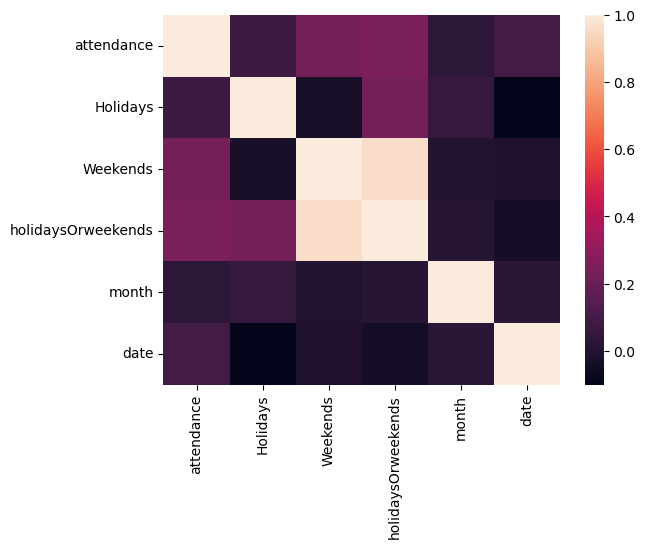

In [212]:
import seaborn as sns
df = pd.read_csv('PortAventuraAttendance.csv')
df['holidaysOrweekends'] = df.Holidays+df.Weekends
df.holidaysOrweekends = df.holidaysOrweekends.apply(lambda x:min(x,1))
df['month'] = df.USAGE_DATE.apply(lambda x:int(x[5:7]))
df['date'] = df.USAGE_DATE.apply(lambda x:int(x[-2:]))
sns.heatmap(df.corr())

In [209]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['attendance'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[1] > 0.05:
    print("time series is NOT stationary")
else:
    print("time series is stationary")


ADF Statistic: -3.245327
p-value: 0.017506
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
time series is stationary


In [213]:
import pandas as pd
df['lag_1'] = df['attendance'].shift(1)  # 昨天的值
df['lag_2'] = df['attendance'].shift(2)  # 前天的值

# 创建滑动窗口统计量
window_size = 7  # 7天的窗口
df['rolling_mean'] = df['attendance'].rolling(window=window_size).mean()  # 7天平均值
df['rolling_max'] = df['attendance'].rolling(window=window_size).max()    # 7天最大值


<AxesSubplot:>

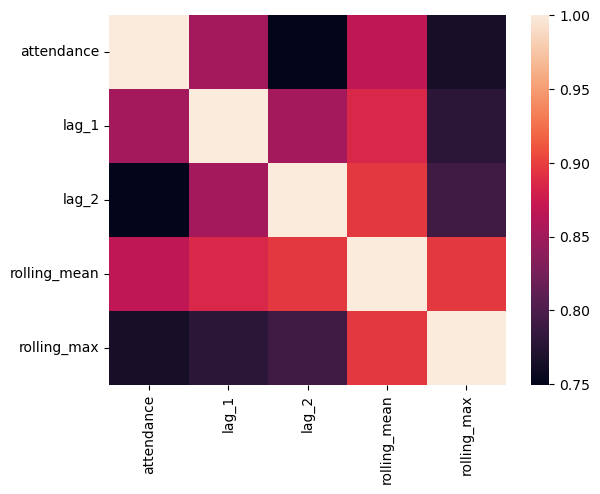

In [216]:
sns.heatmap(df[['attendance','lag_1','lag_2','rolling_mean','rolling_max']].corr())